## /collections/{collection_id}/processes/area:aggregate-time


In [1]:
import xarray as xr
import requests
from IPython.display import GeoJSON
from shapely.geometry import mapping, box 
import numpy as np

In [2]:
dapa_endpoint = 'http://0.0.0.0:8000'

### Get the DAPA collections

In [3]:
query = '{}/collections'.format(dapa_endpoint)

In [4]:
r = requests.get(query)

In [5]:
r.status_code

200

In [6]:
r.json()

{'collections': [{'id': 'S5P-NO2',
   'title': 'Sentinel-5P NO2 column number density over Europe',
   'extent': {'spatial': {'bbox': [[-13, 57, 33, 33]], 'crs': 'EPSG:4326'},
    'temporal': {'interval': [['2018-05-01T00:00:00/2020-04-01T00:00:00']]}}}]}

In [7]:
collection_bbox = r.json()['collections'][0]['extent']['spatial']['bbox']

In [8]:
collection_bbox

[[-13, 57, 33, 33]]

In [9]:
GeoJSON([{'type': 'Feature', 
          'properties': {},
          'geometry': mapping(box(*collection_bbox[0]))}])

<IPython.display.GeoJSON object>

In [10]:
collection = r.json()['collections'][0]['id']

collection

'S5P-NO2'

### Get the collection variables

In [11]:
query = '{}/collections/{}/variables'.format(dapa_endpoint, collection)

In [12]:
r = requests.get(query)

In [13]:
r.status_code

200

In [14]:
variables = r.json()

variables

{'variables': [{'id': 'tropospheric_NO2_column_number_density',
   'title': 'Troposheric NO2 column number density',
   'uom': 'umol/m2'}]}

In [15]:
variable = variables['variables'][0]['id']

variable

'tropospheric_NO2_column_number_density'

### /collections/{collection_id}/processes/area:aggregate-time

In [16]:
bbox = [2.12, 48.75, 2.52, 48.99]

In [17]:
GeoJSON([{'type': 'Feature', 
          'properties': {},
          'geometry': mapping(box(*bbox))}])

<IPython.display.GeoJSON object>

In [18]:
query = '{}/collections/{}/processes/area:aggregate-time'.format(dapa_endpoint,
                                                                  collection)

query

'http://0.0.0.0:8000/collections/S5P-NO2/processes/area:aggregate-time'

In [19]:
params = {'bbox': '{},{},{},{}'.format(*bbox),
          'variable': variable,
          'function': 'mean'}

Submit the request:

In [20]:
r = requests.get(query, params=params)

Get the HTTP exit code:

In [21]:
r.status_code

200

Print the response

In [22]:
r.json()

{'dims': ['y', 'x'],
 'attrs': {},
 'data': [[84.65157318115234,
   87.42823028564453,
   88.314453125,
   90.08355712890625,
   93.10675048828125,
   95.82354736328125,
   96.1407699584961,
   96.9602279663086,
   98.23278045654297,
   99.6905288696289,
   101.0689468383789,
   101.40206146240234,
   101.2553482055664,
   101.3012466430664,
   102.24847412109375,
   102.89236450195312,
   103.90127563476562,
   104.50040435791016,
   104.05036163330078],
  [87.7091064453125,
   92.47943115234375,
   95.86575317382812,
   98.03182983398438,
   100.87938690185547,
   106.49616241455078,
   107.8320541381836,
   106.40878295898438,
   107.23668670654297,
   110.16016387939453,
   111.29349517822266,
   110.67082977294922,
   109.74323272705078,
   109.7514419555664,
   109.67565155029297,
   109.67233276367188,
   108.43685150146484,
   107.13626861572266,
   104.47014617919922],
  [90.57830047607422,
   95.98163604736328,
   100.95467376708984,
   104.12490844726562,
   106.529884338378

In [24]:
area_time_extracted = xr.DataArray.from_dict(r.json())

area_time_extracted

<xarray.DataArray 'tropospheric_NO2_column_number_density' (y: 11, x: 19)>
array([[ 84.65157318,  87.42823029,  88.31445312,  90.08355713,
         93.10675049,  95.82354736,  96.14076996,  96.96022797,
         98.23278046,  99.69052887, 101.06894684, 101.40206146,
        101.25534821, 101.30124664, 102.24847412, 102.8923645 ,
        103.90127563, 104.50040436, 104.05036163],
       [ 87.70910645,  92.47943115,  95.86575317,  98.03182983,
        100.8793869 , 106.49616241, 107.83205414, 106.40878296,
        107.23668671, 110.16016388, 111.29349518, 110.67082977,
        109.74323273, 109.75144196, 109.67565155, 109.67233276,
        108.4368515 , 107.13626862, 104.47014618],
       [ 90.57830048,  95.98163605, 100.95467377, 104.12490845,
        106.52988434, 113.01528931, 117.65415192, 118.38803101,
        119.3013916 , 120.63299561, 121.95343781, 123.11656952,
        119.95090485, 117.37213898, 115.20748901, 113.33275604,
        110.48754883, 106.03223419, 102.15303802],
       [ 92.56179047,  98.87844849, 103.33243561, 107.72600555,
        110.25808716, 115.31188965, 121.25460052, 124.43466187,
        126.08142853, 128.20487976, 129.14179993, 128.7265625 ,
        124.25014496, 119.93193817, 117.30335236, 113.97711182,
        110.1534729 , 105.35816193, 101.11737061],
       [ 94.8269043 , 101.67785645, 106.02508545, 111.20752716,
        113.65590668, 116.95475006, 120.62078094, 124.54349518,
        129.3168335 , 133.41958618, 134.3835907 , 135.38766479,
        129.32304382, 122.24510956, 118.02159882, 113.3560791 ,
        109.78270721, 103.49378204,  99.07180023],
       [ 92.13085938,  99.14514923, 104.00783539, 109.84256744,
        114.90151215, 118.23849487, 121.79986572, 126.08362579,
        130.24745178, 134.25820923, 134.92076111, 133.77485657,
        128.88768005, 123.35098267, 118.16965485, 111.95200348,
        108.12548828, 103.58773041,  98.15133667],
       [ 90.81350708,  94.39691925,  99.62515259, 105.15335083,
        112.75057983, 117.20358276, 121.59886932, 125.98526764,
        129.14198303, 132.56121826, 133.09535217, 131.30006409,
        127.89733124, 122.66412354, 117.05973053, 109.94669342,
        105.16723633, 102.02114868,  96.65203094],
       [ 89.47632599,  92.69989777,  95.68444824, 100.29742432,
        108.54424286, 114.98190308, 118.64728546, 122.4553299 ,
        126.22751617, 127.26842499, 127.10202026, 125.4881897 ,
        123.79328156, 119.32497406, 114.82684326, 108.28469086,
        103.02023315,  99.79276276,  95.30420685],
       [ 88.50730133,  94.35100555,  96.95980835, 100.62169647,
        106.58258057, 113.12317657, 115.50402832, 117.31395721,
        121.16268158, 121.45052338, 120.78438568, 120.67737579,
        119.40692139, 115.30379486, 111.4897995 , 107.34224701,
        102.5007019 ,  99.66116333,  94.38507843],
       [ 88.65856171,  92.40061188,  95.74858856, 100.22829437,
        105.0508194 , 109.57306671, 112.5497818 , 113.14432526,
        116.62670135, 118.17647552, 116.33472443, 116.10968018,
        117.2362442 , 113.22988892, 109.51242828, 106.52075958,
        102.9465332 ,  97.59356689,  90.58420563],
       [ 89.35709381,  92.72528839,  95.51821136,  98.66726685,
        101.72750092, 104.70238495, 109.52143097, 111.54434204,
        114.384758  , 115.93079376, 116.07296753, 115.20901489,
        116.01502228, 113.57924652, 108.91004181, 103.14949799,
         99.11142731,  93.39673615,  86.64498138]])
Coordinates:
  * x        (x) float64 2.12 2.142 2.164 2.186 2.208 ... 2.45 2.472 2.494 2.516
  * y        (y) float64 48.99 48.97 48.94 48.92 ... 48.83 48.81 48.79 48.77

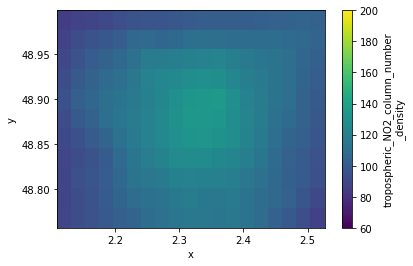

In [26]:
area_time_extracted.plot(vmin=60, vmax=200)